
**Learn the Basics** ||
[Quickstart](quickstart_tutorial.html) ||
[Tensors](tensorqs_tutorial.html) ||
[Datasets & DataLoaders](data_tutorial.html) ||
[Transforms](transforms_tutorial.html) ||
[Build Model](buildmodel_tutorial.html) ||
[Autograd](autogradqs_tutorial.html) ||
[Optimization](optimization_tutorial.html) ||
[Save & Load Model](saveloadrun_tutorial.html)

# Learn the Basics

Authors:
[Suraj Subramanian](https://github.com/suraj813),
[Seth Juarez](https://github.com/sethjuarez/),
[Cassie Breviu](https://github.com/cassieview/),
[Dmitry Soshnikov](https://soshnikov.com/),
[Ari Bornstein](https://github.com/aribornstein/)

Most machine learning workflows involve working with data, creating models, optimizing model
parameters, and saving the trained models. This tutorial introduces you to a complete ML workflow
implemented in PyTorch, with links to learn more about each of these concepts.

We'll use the FashionMNIST dataset to train a neural network that predicts if an input image belongs
to one of the following classes: T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker,
Bag, or Ankle boot.

`This tutorial assumes a basic familiarity with Python and Deep Learning concepts.`


## Running the Tutorial Code
You can run this tutorial in a couple of ways:

- **In the cloud**: This is the easiest way to get started! Each section has a "Run in Microsoft Learn" and "Run in Google Colab" link at the top, which opens an integrated notebook in Microsoft Learn or Google Colab, respectively, with the code in a fully-hosted environment.
- **Locally**: This option requires you to setup PyTorch and TorchVision first on your local machine ([installation instructions](https://pytorch.org/get-started/locally/)). Download the notebook or copy the code into your favorite IDE.


## How to Use this Guide
If you're familiar with other deep learning frameworks, check out the [0. Quickstart](quickstart_tutorial.html) first
to quickly familiarize yourself with PyTorch's API.

If you're new to deep learning frameworks, head right into the first section of our step-by-step guide: [1. Tensors](tensor_tutorial.html).


.. include:: /beginner_source/basics/qs_toc.txt

.. toctree::
   :hidden:


In [29]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



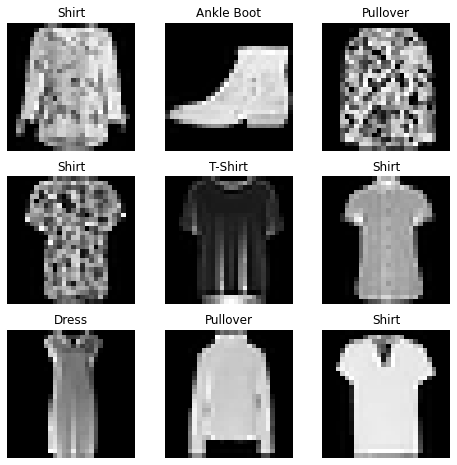

In [33]:
labels_map ={
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8,8))
cols,rows = 3,3
for i in range(1,cols*rows+1):
  sample_idx = torch.randint(len(training_data),size=(1,)).item()
  img,label = training_data[sample_idx]
  figure.add_subplot(rows,cols,i)
  plt.title(labels_map[label])
  plt.axis('off')
  plt.imshow(img.squeeze(),cmap='gray')
plt.show()


In [34]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
  def __init__(self,annotations_file,img_dir,transform=None,target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

  def __len__(self):
    return len(self.img_labels)
  
  def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir,self.img_dir.iloc[idx,0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx,1]
    if self.transform:
      image = self.transform(image)
    if self.target_transform:
      label = self.target_transform(label)
    return image,label

  

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


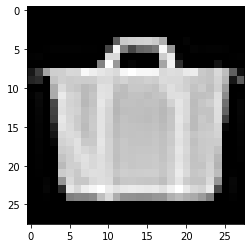

Label: 8


In [36]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")